In [1]:
print ("UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD")
print ("REGRESION LOGISTICA")
print ("SARA LUCIA CORREDOR NARANJO")
print ("Enfermedad Cardiaca Cleveland UCI")

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD
REGRESION LOGISTICA
SARA LUCIA CORREDOR NARANJO
Enfermedad Cardiaca Cleveland UCI


In [2]:
#Cargar Librerias necesarias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#Librerias para implementar modelos de ciencia de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
df = pd.read_csv('C:/UNAD/heart_cleveland_upload.csv')

#Mostrar las primeras filas
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [5]:
print ("PASOS DE LA ACTIVIDAD")
print ("1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.")

PASOS DE LA ACTIVIDAD
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


Dimensiones del dataset: (297, 14)

Tipos de datos:
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

Valores faltantes por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


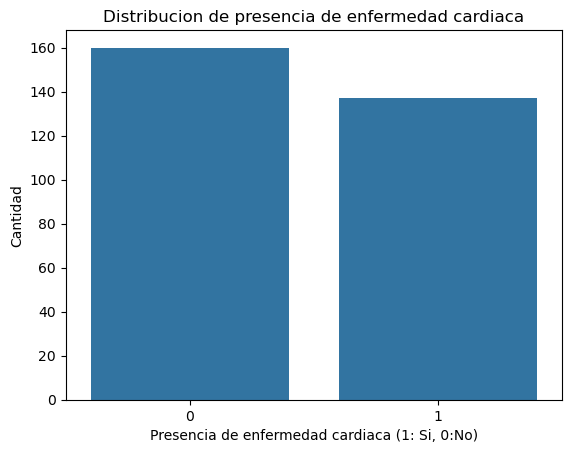

In [6]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores faltantes por columna:\n", df.isnull().sum())

df.describe()

sns.countplot(x='condition', data=df)
plt.title('Distribucion de presencia de enfermedad cardiaca')
plt.xlabel('Presencia de enfermedad cardiaca (1: Si, 0:No)')
plt.ylabel('Cantidad')
plt.show()

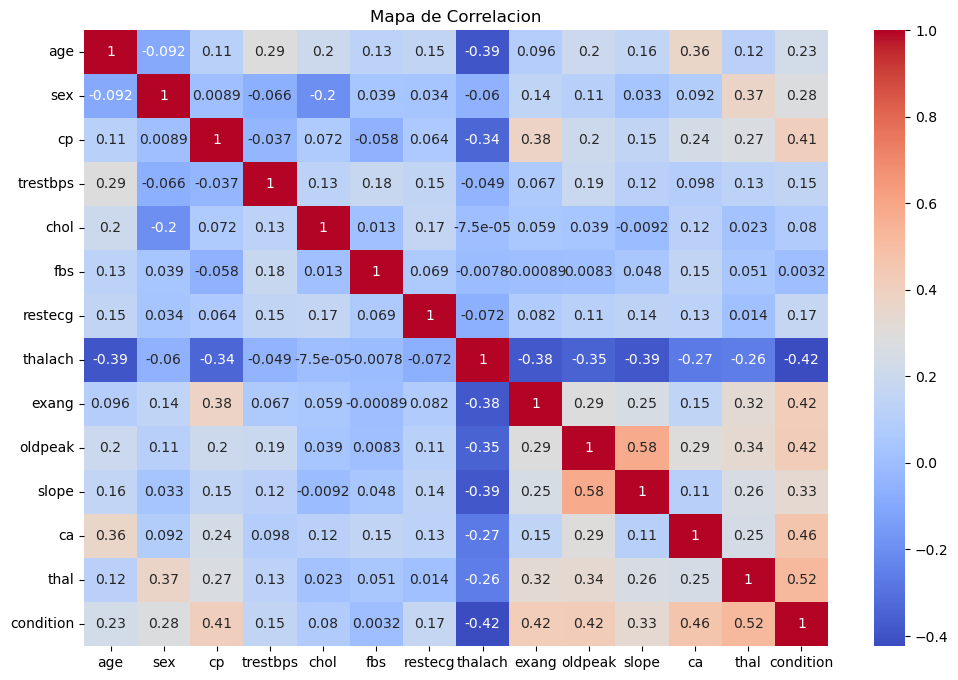

In [7]:
#Mapa de correlacion
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlacion")
plt.show()

In [8]:
print ("2. Procesar los datos limpiándolos, tratando valores faltantes y transformandolos segun sea necesario.")

2. Procesar los datos limpiándolos, tratando valores faltantes y transformandolos segun sea necesario.


In [9]:
df = df.replace('?', np.nan)
df = df.dropna()

df = df.apply(pd.to_numeric)

x = df.drop("condition", axis=1)
y = df["condition"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
print ("3. Seleccionar las caracteristicas más relevantes para entrenar el modelo utilizando seleccion de caracteristicas.")

3. Seleccionar las caracteristicas más relevantes para entrenar el modelo utilizando seleccion de caracteristicas.


In [11]:
selector = SelectKBest(score_func=chi2, k=10)
x_new = selector.fit_transform(x, y)

selected_features = selector.get_support(indices=True)
selected_columns = x.columns[selected_features]
print("Caracteristicas más relevantes seleccionadas:", selected_columns.tolist())

scaler = StandardScaler()
x = pd.DataFrame(x_new, columns=selected_columns)
x_scaled = scaler.fit_transform(x)

Caracteristicas más relevantes seleccionadas: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [12]:
print ("4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.")

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print ("5. Entrenar el modelo configurando los diferentes hiperparametros.")

5. Entrenar el modelo configurando los diferentes hiperparametros.


In [15]:
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [16]:
print ("6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc.")

6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc.


In [17]:
y_pred = modelo.predict(x_test)

print("Reporte de Clasificacion:\n")
print(classification_report(y_test, y_pred))

Reporte de Clasificacion:

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60



In [18]:
print ("7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.")

7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.


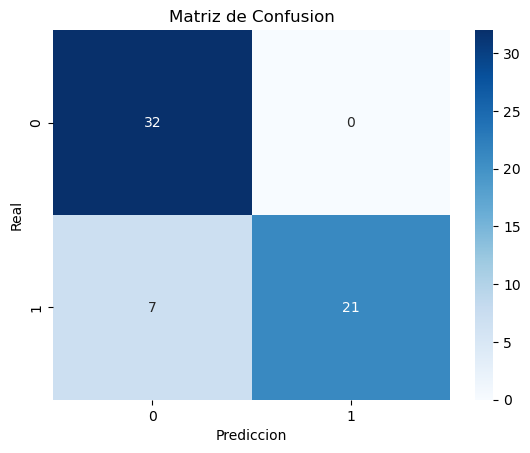

In [19]:
#Matriz de Confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.title("Matriz de Confusion")
plt.show()

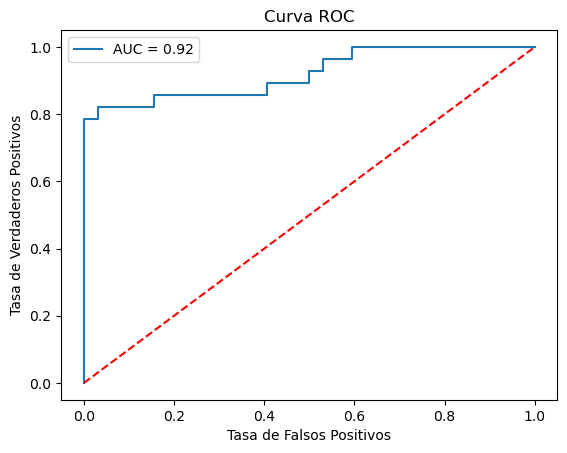

In [20]:
#Curva ROC y AUC
y_pred_proba = modelo.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [21]:
print ("8.Interpretar, análizar y documentar los resultados obtenidos.")

8.Interpretar, análizar y documentar los resultados obtenidos.


In [22]:
# Interpretación y análisis de resultados
print("""
- Con la matriz de confusion se pede interpretar los verdaderos positivos fue donde el modelo predijo correctamente que habia enfermedad
  con los casos de verdaderos negativos, el modelo predijo correctamente que no habia enfermedad 
  con los casos de falsos positivos, el modelo predijo enfermedad pero no la habia
  y con los falsos negativos, el modelo dijo que no habia enfermedad, pero si la habia
  Si el numero de FN es alto, quiere decir que el modelo no esta detectando bien los pacientes enfermos, mientras que si el numero de FP es alto, el 
  modelo tiene a hacer un sobre diagnostico
- Con la curva ROC y AUC ayuda a identificar que el modelo puede distinguir entre clases (enfermo/no enfermo)
  si el AUC de 0.90 o más es modelo es excelente 
  si esta entre 0.80-0.90 el modelo es bueno
  si esta entre 0.70-0.80 es aceptable 
  y si es menor a 0.70 necesita mejoras 
- Con el mapa de correlacion ayuda a ver como se relacionan las variables entre si, es decir, que si la variable condition esta altamente correlacionada
con otras variables como la frecuencia cardiaca maxima o el tipo de dolor de pecho, puede significar que estos son predictores de la enfermedad. 
""")


- Con la matriz de confusion se pede interpretar los verdaderos positivos fue donde el modelo predijo correctamente que habia enfermedad
  con los casos de verdaderos negativos, el modelo predijo correctamente que no habia enfermedad 
  con los casos de falsos positivos, el modelo predijo enfermedad pero no la habia
  y con los falsos negativos, el modelo dijo que no habia enfermedad, pero si la habia
  Si el numero de FN es alto, quiere decir que el modelo no esta detectando bien los pacientes enfermos, mientras que si el numero de FP es alto, el 
  modelo tiene a hacer un sobre diagnostico
- Con la curva ROC y AUC ayuda a identificar que el modelo puede distinguir entre clases (enfermo/no enfermo)
  si el AUC de 0.90 o más es modelo es excelente 
  si esta entre 0.80-0.90 el modelo es bueno
  si esta entre 0.70-0.80 es aceptable 
  y si es menor a 0.70 necesita mejoras 
- Con el mapa de correlacion ayuda a ver como se relacionan las variables entre si, es decir, que si la variable c